In [80]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split


from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Modelling Helper
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV

import keras
from keras import backend as K

## Reading the Files

In [81]:
state_path = "/content/state - state.csv"
store_path = "/content/store - store.csv"
test_path = "/content/test - test.csv"
train_path = "/content/train - train.csv"

In [82]:
state_data = pd.read_csv(state_path)
store_data = pd.read_csv(store_path)
test_data = pd.read_csv(test_path)
data = pd.read_csv(train_path)

In [83]:
data.Date.unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

In [84]:
data.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [85]:
data.StateHoliday.fillna(data.StateHoliday.mode()[0], inplace=True)
data.SchoolHoliday.fillna(data.SchoolHoliday.mode()[0], inplace=True)

In [86]:
li = ["DayOfWeek" , "StateHoliday" , "SchoolHoliday"]

for i in li:
  print(i)
  print(data[i].unique())

DayOfWeek
[5 4 3 2 1 7 6]
StateHoliday
['0' 'a' 'b' 'c' 0]
SchoolHoliday
[1 0]


In [87]:
data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

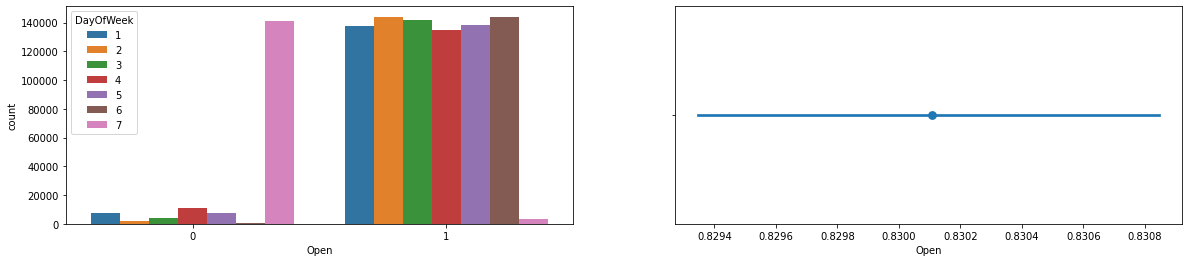

In [88]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(20,4))
sns.countplot(x='Open',hue='DayOfWeek', data=data, ax=axis1)
sns.pointplot(x='Open',hue='DayOfWeek', data=data, ax=axis2)

In [89]:
def extract1(x):
    return int(str(x)[:4])

def extract2(x):
    return int(str(x)[5:7])

def extract3(x):
    return (str(x)[:7])

In [90]:
data['Date'] = data['Date'].apply(extract3)
data['Date'] = data['Date'].apply(extract3)
data['Year']  = data['Date'].apply(extract1)
data['Month'] = data['Date'].apply(extract2)
data['Year']  = data['Date'].apply(extract1)
data['Month'] = data['Date'].apply(extract2)
avgsales    = data.groupby('Date')["Sales"].mean()
percentchngsales = data.groupby('Date')["Sales"].sum().pct_change()

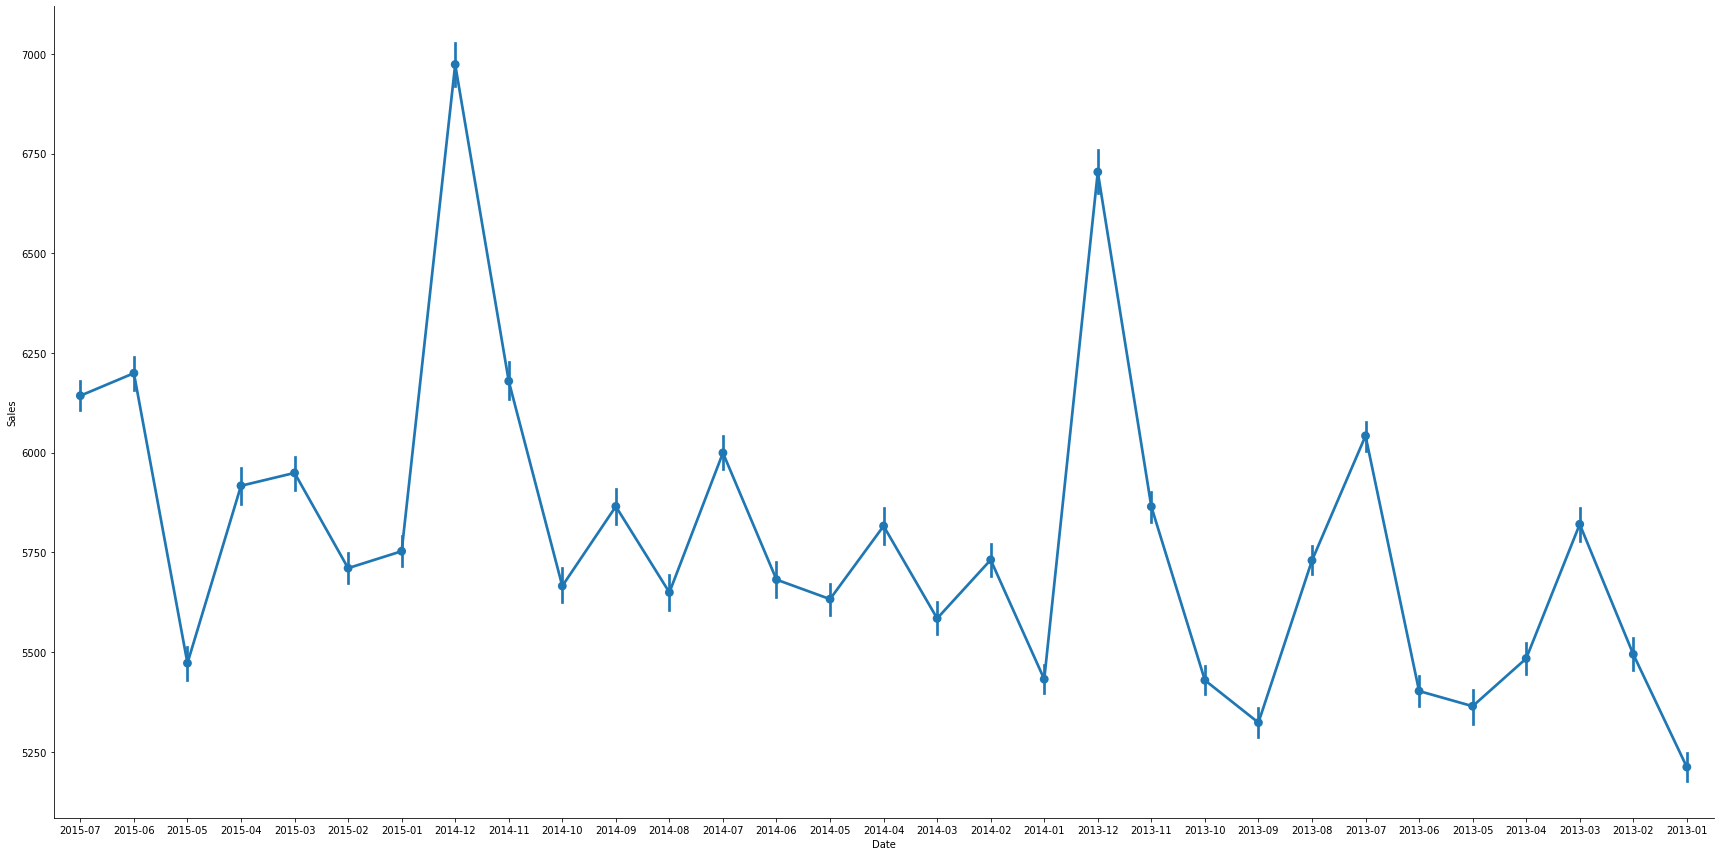

In [91]:
sns.factorplot(x="Date" ,y = "Sales" , data=data, kind="point", aspect=2,size=12)

In [92]:
#plt.xlabel('Date')
#plt.ylabel('Sales')
#plt.plot(data)

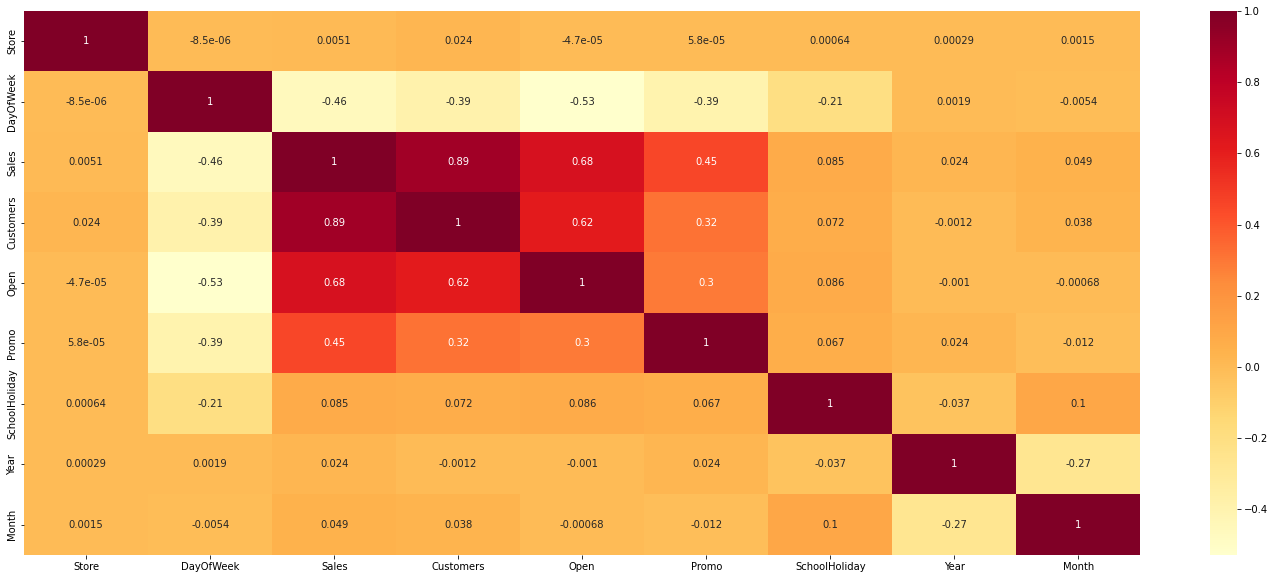

In [93]:
plt.figure(figsize=(25,10))
sns.heatmap(data.corr(), annot=True, cmap='YlOrRd') 
plt.show()
plt.close()


In [94]:
def plotter(StringA , StringB):
  fig, axes = plt.subplots(2,1)
  fig.set_size_inches(15, 10)
  sns.barplot(x=StringA, y=StringB, data=data ,hue="DayOfWeek", ax = axes[0])
  sns.boxplot(x=StringA, y=StringB, data=data ,hue="DayOfWeek", ax=axes[1])

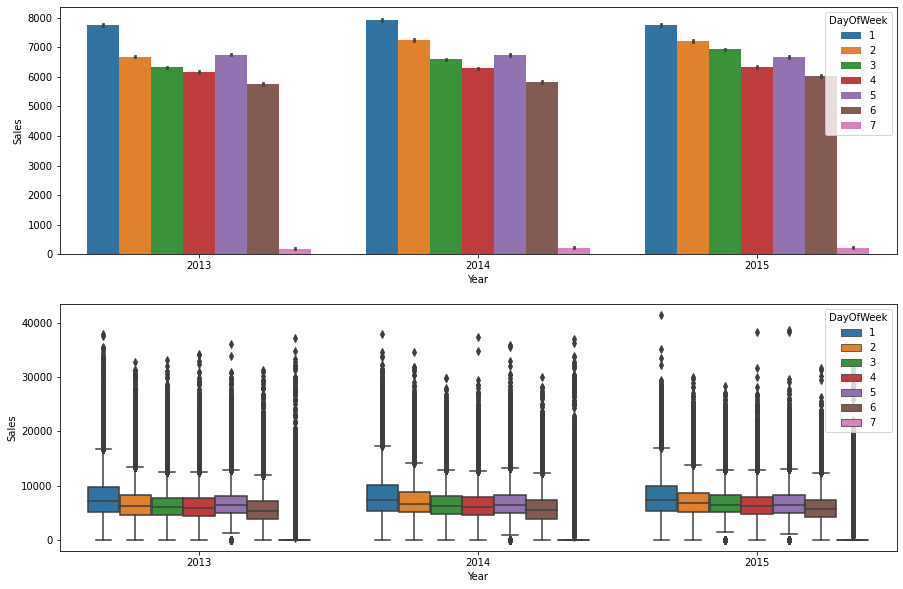

In [95]:
plotter("Year" , "Sales")

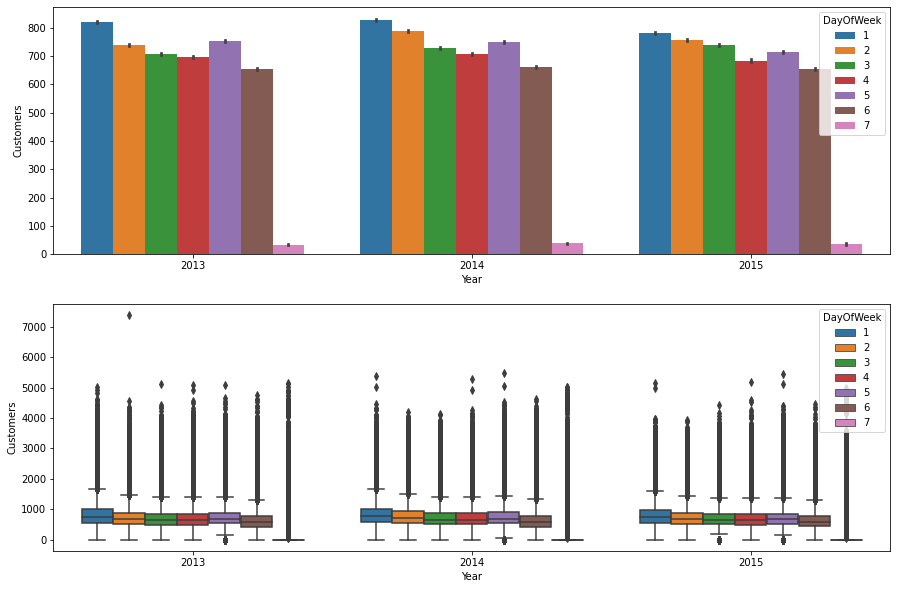

In [96]:
plotter("Year" , "Customers")

In [97]:
data["StateHoliday"] = data["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})
test_data["StateHoliday"] = test_data["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

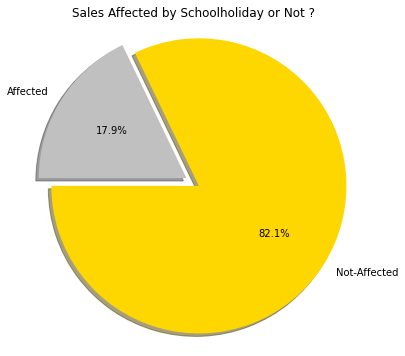

In [98]:
labels = 'Not-Affected' , 'Affected'
sizes = data.SchoolHoliday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()


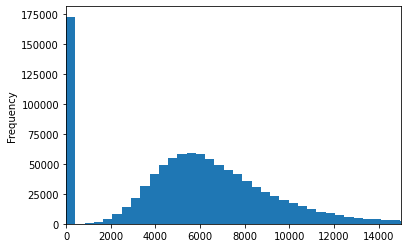

In [99]:
data["Sales"].plot(kind='hist',bins=100,xlim=(0,15000))

In [100]:
temp = []
for i in data.groupby('Store')[["Sales", "Customers"]].mean()["Sales"]:
  temp.append(i)
store_data["Sales"] = temp

In [101]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Sales
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3945.704883
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",4122.991507
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",5741.253715
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,8021.769639
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,3867.110403


In [102]:
store_data.CompetitionDistance.fillna(store_data.CompetitionDistance.mode()[0], inplace=True)
store_data.CompetitionOpenSinceMonth.fillna(store_data.CompetitionOpenSinceMonth.mode()[0], inplace=True)
store_data.CompetitionOpenSinceYear.fillna(store_data.CompetitionOpenSinceYear.mode()[0], inplace=True)
store_data.Promo2SinceWeek.fillna(store_data.Promo2SinceWeek.mode()[0], inplace=True)
store_data.Promo2SinceYear.fillna(store_data.Promo2SinceYear.mode()[0], inplace=True)
store_data.PromoInterval.fillna(store_data.PromoInterval.mode()[0], inplace=True)

In [103]:
store_data.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Sales                        0
dtype: int64

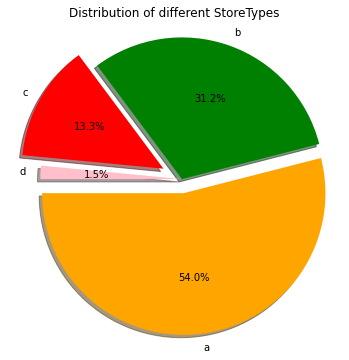

In [104]:
labels = 'a' , 'b' , 'c' , 'd'
sizes = store_data.StoreType.value_counts()
colors = ['orange', 'green' , 'red' , 'pink']
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Distribution of different StoreTypes")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

In [105]:
def plotmaster(StringA , StringB):
  fig, axes = plt.subplots(3,1)
  fig.set_size_inches(12, 15)
  sns.barplot(x=StringA, y=StringB, data=store_data ,hue="StoreType", ax = axes[0])
  sns.boxplot(x=StringA, y=StringB, data=store_data ,hue="StoreType", ax=axes[1])
  sns.violinplot(x=StringA, y=StringB, data=store_data, hue="StoreType" , ax=axes[2])

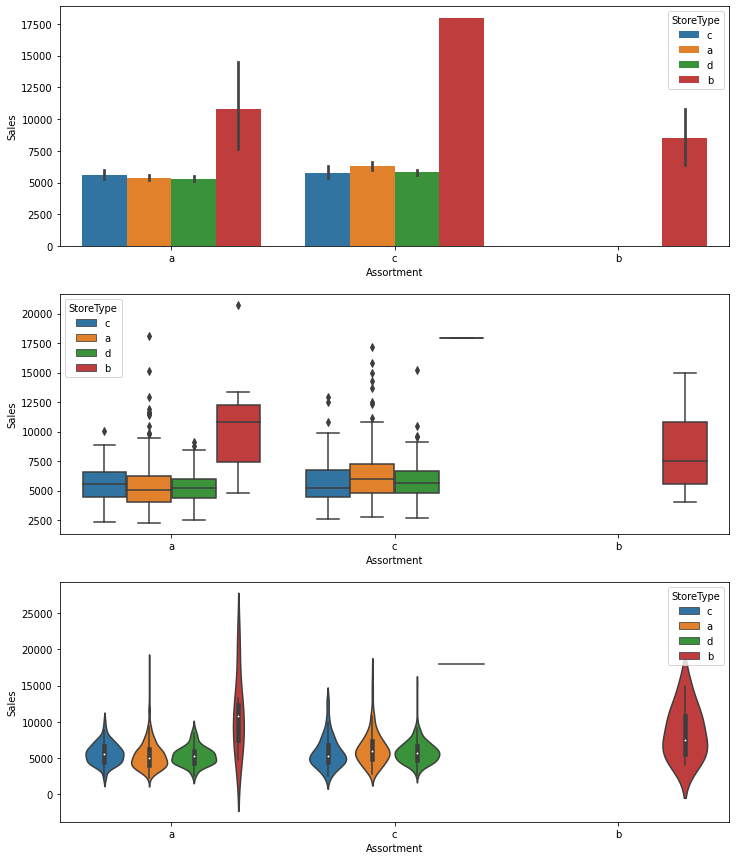

In [106]:
plotmaster("Assortment" , "Sales")

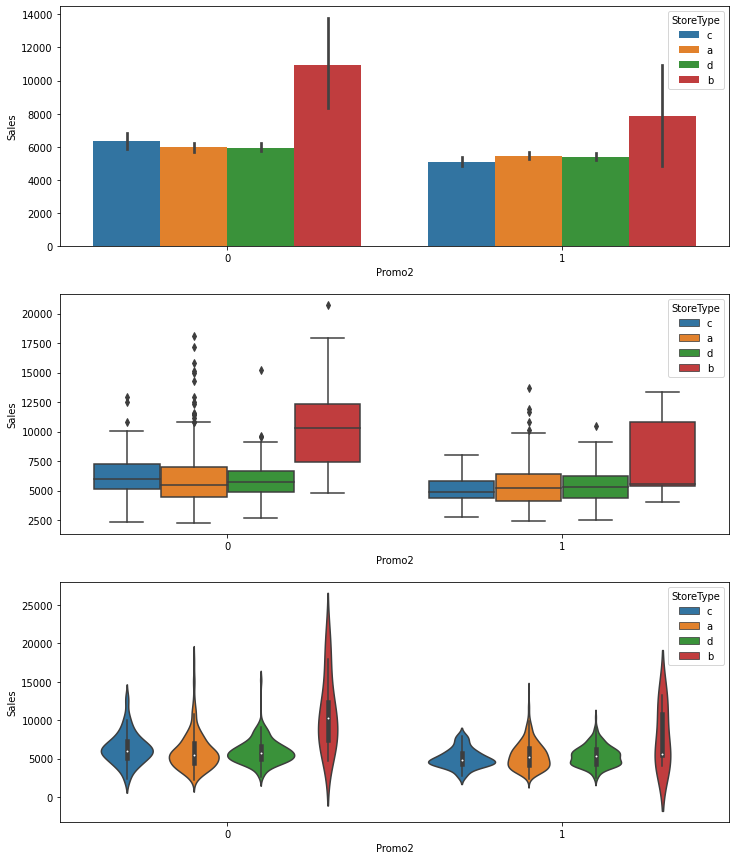

In [107]:
plotmaster("Promo2" , "Sales")

In [108]:
data[(data.Open == 1) & (data.DayOfWeek == 7)]['Store'].unique()

array([  85,  122,  209,  259,  262,  274,  299,  310,  335,  353,  423,
        433,  453,  494,  512,  524,  530,  562,  578,  676,  682,  732,
        733,  769,  863,  867,  931,  948, 1045, 1081, 1097, 1099,  877])

In [109]:
new = data.copy()
data = new.copy()

In [110]:
test_data

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [111]:
test_data.fillna(1, inplace=True)
data = data[data["Open"] != 0]
data = data[data["Sales"] > 0]
data['log_sales'] = np.log(data['Sales'])
data = pd.merge(data, store_data, on='Store')
test_data = pd.merge(test_data, store_data, on='Store')
data.fillna(0,inplace=True)
test_data.fillna(0,inplace=True)

In [112]:
new.head().Date

0    2015-07
1    2015-07
2    2015-07
3    2015-07
4    2015-07
Name: Date, dtype: object

In [113]:
data["year"]=data.Date.apply(extract1)
data["month"]=data.Date.apply(extract2)

In [114]:
test_data["year"]=test_data.Date.apply(extract1)
test_data["month"]=test_data.Date.apply(extract2)
test_data["Day"]=test_data.Date.apply(lambda x: int(str(x)[8:10]))

In [115]:
data = pd.get_dummies(data,columns=['StoreType','Assortment','year'])
test = pd.get_dummies(test_data,columns=['StoreType','Assortment','year'])
test_data['year_2013']=0
test_data['year_2014']=0

In [116]:
data

,Store,DayOfWeek,Date,Sales_x,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,year_2013,year_2014,year_2015
0,1,5,2015-07,5263,555,1,1,0,1,2015,...,0,0,1,0,1,0,0,0,0,1
1,1,4,2015-07,5020,546,1,1,0,1,2015,...,0,0,1,0,1,0,0,0,0,1
2,1,3,2015-07,4782,523,1,1,0,1,2015,...,0,0,1,0,1,0,0,0,0,1
3,1,2,2015-07,5011,560,1,1,0,1,2015,...,0,0,1,0,1,0,0,0,0,1
4,1,1,2015-07,6102,612,1,1,0,1,2015,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,292,1,2013-01,9291,1002,1,1,0,0,2013,...,1,0,0,0,1,0,0,1,0,0
844334,292,6,2013-01,2748,340,1,0,0,0,2013,...,1,0,0,0,1,0,0,1,0,0
844335,292,5,2013-01,4202,560,1,0,0,1,2013,...,1,0,0,0,1,0,0,1,0,0
844336,292,4,2013-01,4580,662,1,0,0,1,2013,...,1,0,0,0,1,0,0,1,0,0


In [117]:
data.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales_x                      0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Year                         0
Month                        0
log_sales                    0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Sales_y                      0
month                        0
StoreType_a                  0
StoreType_b                  0
StoreType_c                  0
StoreType_d                  0
Assortment_a                 0
Assortment_b                 0
Assortment_c                 0
year_2013                    0
year_2014                    0
year_2015                    0
dtype: int64

In [118]:
data.StateHoliday.fillna(data.StateHoliday.mode()[0], inplace=True)

In [119]:
data.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales_x                      0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Year                         0
Month                        0
log_sales                    0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Sales_y                      0
month                        0
StoreType_a                  0
StoreType_b                  0
StoreType_c                  0
StoreType_d                  0
Assortment_a                 0
Assortment_b                 0
Assortment_c                 0
year_2013                    0
year_2014                    0
year_2015                    0
dtype: int64

In [120]:
data

,Store,DayOfWeek,Date,Sales_x,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,year_2013,year_2014,year_2015
0,1,5,2015-07,5263,555,1,1,0,1,2015,...,0,0,1,0,1,0,0,0,0,1
1,1,4,2015-07,5020,546,1,1,0,1,2015,...,0,0,1,0,1,0,0,0,0,1
2,1,3,2015-07,4782,523,1,1,0,1,2015,...,0,0,1,0,1,0,0,0,0,1
3,1,2,2015-07,5011,560,1,1,0,1,2015,...,0,0,1,0,1,0,0,0,0,1
4,1,1,2015-07,6102,612,1,1,0,1,2015,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,292,1,2013-01,9291,1002,1,1,0,0,2013,...,1,0,0,0,1,0,0,1,0,0
844334,292,6,2013-01,2748,340,1,0,0,0,2013,...,1,0,0,0,1,0,0,1,0,0
844335,292,5,2013-01,4202,560,1,0,0,1,2013,...,1,0,0,0,1,0,0,1,0,0
844336,292,4,2013-01,4580,662,1,0,0,1,2013,...,1,0,0,0,1,0,0,1,0,0


In [121]:
X = data.drop(['Sales_x','log_sales','Store','Date','Customers','CompetitionOpenSinceYear','Promo2SinceYear','PromoInterval','Year','year_2014','year_2013'] , axis = 1)
y = data['log_sales']

In [122]:
X.columns

Index(['DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Month',
       'CompetitionDistance', 'CompetitionOpenSinceMonth', 'Promo2',
       'Promo2SinceWeek', 'Sales_y', 'month', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c', 'year_2015'],
      dtype='object')

In [123]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=7)
X_test = test.drop(['Id','Store','Date' ,'CompetitionOpenSinceYear','Promo2SinceYear','PromoInterval'] , axis = 1)

In [124]:
X_test.columns

Index(['DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth', 'Promo2',
       'Promo2SinceWeek', 'Sales', 'month', 'Day', 'StoreType_a',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_a',
       'Assortment_b', 'Assortment_c', 'year_2015'],
      dtype='object')

In [125]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train , y_train)
pred = reg.predict(X_val)

log_sales=reg.predict(X_val)
print(log_sales)

[9.02742131 8.88316485 9.09011324 ... 8.32862353 8.88143081 8.99592428]


In [126]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_val,pred))
print(rmse)

0.23116726529405165


In [127]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf.fit(X_train , y_train)
pred = clf.predict(X_val)

In [128]:
rmse = np.sqrt(mean_squared_error(y_val,pred))
print(rmse)

0.16721945042032163


In [129]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [130]:
rf.score(X_val,y_val)

0.8722543923114083

In [131]:
X_Test = X_test.copy()

In [132]:
a = X_test["year_2015"]

In [133]:
X_test["year_2015"] = a

In [134]:
X_test.columns

Index(['DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth', 'Promo2',
       'Promo2SinceWeek', 'Sales', 'month', 'Day', 'StoreType_a',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_a',
       'Assortment_b', 'Assortment_c', 'year_2015'],
      dtype='object')

In [135]:
X_train

,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Month,CompetitionDistance,CompetitionOpenSinceMonth,Promo2,Promo2SinceWeek,Sales_y,month,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,year_2015
589964,4,1,0,0,0,6,630.0,4.0,0,14.0,4075.907643,6,1,0,0,0,1,0,0,0
375893,4,1,1,0,1,7,1610.0,9.0,0,14.0,7513.288747,7,1,0,0,0,0,0,1,0
273606,4,1,1,0,0,12,250.0,9.0,0,14.0,5937.593418,12,1,0,0,0,1,0,0,0
129028,1,1,0,0,0,6,350.0,12.0,0,14.0,6851.912951,6,1,0,0,0,1,0,0,1
473784,3,1,1,0,0,1,3970.0,3.0,0,14.0,4967.269639,1,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759363,2,1,1,0,0,6,3890.0,11.0,1,5.0,5276.146497,6,0,0,1,0,0,0,1,1
535030,6,1,0,0,0,11,500.0,12.0,0,14.0,8228.600849,11,1,0,0,0,1,0,0,0
573977,1,1,0,0,1,9,560.0,1.0,0,14.0,6300.434183,9,1,0,0,0,1,0,0,0
189636,2,1,1,0,1,6,250.0,9.0,1,5.0,4752.333333,6,1,0,0,0,0,0,1,1


In [136]:
clf

DecisionTreeRegressor()

In [137]:
X

,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Month,CompetitionDistance,CompetitionOpenSinceMonth,Promo2,Promo2SinceWeek,Sales_y,month,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,year_2015
0,5,1,1,0,1,7,1270.0,9.0,0,14.0,3945.704883,7,0,0,1,0,1,0,0,1
1,4,1,1,0,1,7,1270.0,9.0,0,14.0,3945.704883,7,0,0,1,0,1,0,0,1
2,3,1,1,0,1,7,1270.0,9.0,0,14.0,3945.704883,7,0,0,1,0,1,0,0,1
3,2,1,1,0,1,7,1270.0,9.0,0,14.0,3945.704883,7,0,0,1,0,1,0,0,1
4,1,1,1,0,1,7,1270.0,9.0,0,14.0,3945.704883,7,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,1,1,1,0,0,1,1100.0,6.0,0,14.0,4695.279193,1,1,0,0,0,1,0,0,0
844334,6,1,0,0,0,1,1100.0,6.0,0,14.0,4695.279193,1,1,0,0,0,1,0,0,0
844335,5,1,0,0,1,1,1100.0,6.0,0,14.0,4695.279193,1,1,0,0,0,1,0,0,0
844336,4,1,0,0,1,1,1100.0,6.0,0,14.0,4695.279193,1,1,0,0,0,1,0,0,0


In [138]:
final_predictions_Decision_tree = clf.predict(X_test)

In [139]:
dic = {
    'Id':test['Id'].astype(int),
    'Sales': np.exp(final_predictions_Decision_tree)
}

result = pd.DataFrame(dic ,columns=['Id','Sales'])

In [140]:
result  #Result from Decision Tree Regressor

,Id,Sales
0,1,3335.161300
1,857,3546.070360
2,1713,3598.319148
3,2569,6235.000000
4,3425,2096.346098
...,...,...
41083,37664,3546.070360
41084,38520,3598.319148
41085,39376,6235.000000
41086,40232,1612.000000


In [141]:
Linear_reg_Result = reg.predict(X_test)

In [142]:
dic = {
    'Id':test['Id'].astype(int),
    'Sales': np.exp(Linear_reg_Result)
}

result1 = pd.DataFrame(dic ,columns=['Id','Sales'])

In [143]:
result1 #Result from Linear_Regression

,Id,Sales
0,1,4.047755e+07
1,857,4.114483e+07
2,1713,4.182312e+07
3,2569,4.251259e+07
4,3425,2.683836e+07
...,...,...
41083,37664,1.342009e+17
41084,38520,1.364133e+17
41085,39376,1.386621e+17
41086,40232,8.753789e+16


In [144]:
Random_forest_Result = rf.predict(X_test)

In [145]:
dic = {
    'Id':test['Id'].astype(int),
    'Sales': np.exp(Random_forest_Result)
}

result2 = pd.DataFrame(dic ,columns=['Id','Sales'])

In [146]:
result2 #Result From Random_Forest_Regressor

,Id,Sales
0,1,3833.489977
1,857,3906.055545
2,1713,4228.751658
3,2569,5124.239975
4,3425,2225.989344
...,...,...
41083,37664,3845.775814
41084,38520,4345.709304
41085,39376,4903.013062
41086,40232,1889.163633
